In [1]:
%%capture
%matplotlib inline
import os
import sys
import importlib
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import requests
from PIL import Image, ImageEnhance
from csv import reader
from apps.testing.image_process import pre_process
from tqdm.notebook import tqdm
tqdm().pandas()
from sklearn.metrics import *

base_folder='/Users/lorneluo/lorne/poolhub/'

In [2]:
importlib.reload(pre_process)

csv_name = "th.csv"
df=pre_process.process_stripe_image(csv_name)
print(df)

  0%|          | 0/59 [00:00<?, ?it/s]

        file_path  white_balance_y  white_balance_x  color_y  color_x  \
45   IMG_7490.jpg             2014              590     2022      466   
32   IMG_7282.jpg             1776              546     1778      426   
31   IMG_7281.jpg             1864             2208     1866     2146   
0   File_031.jpeg              346              134      347      108   
1   File_021.jpeg             2140              526     2146      434   
2   File_032.jpeg              350              130      351      106   
3   File_026.jpeg             1946              406     1966      300   
50   IMG_7529.jpg             1764              594     1764      440   
38   IMG_7436.jpg             2061              384     2064      306   
4   File_006.jpeg             2016              522     2016      426   
6   File_009.jpeg             1910              522     1910      388   
5   File_019.jpeg             1920              556     1924      454   
7   File_017.jpeg             2112              588

In [3]:
importlib.reload(pre_process)

with open('th.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    next(csv_reader, None)  # skip the headers
    for row in csv_reader:
        # print(row)
        file_path,wb_x,wb_y,color_x,color_y,value,_,_,_=row
        color_pos=(int(color_x), int(color_y))
        wb_pos=(int(wb_x), int(wb_y))
        path=os.path.join(base_folder,file_path)
        # print(path,wb_pos,color_pos)
        image = Image.open(path)
        white_balanced_image = pre_process.white_balance(image,wb_pos)
        wb_color=pre_process.pick_average_color(white_balanced_image,wb_pos,(16,16))
        th_color=pre_process.pick_average_color(white_balanced_image,color_pos,(16,16))
        print(value,':',th_color,',')
        # plt.imshow(image)
        # plt.imshow(pre_process.crop_area(white_balanced_image,color_pos,(32,32)))

49.0 : (168, 172, 179) ,
55.0 : (207, 206, 204) ,
68.0 : (174, 174, 174) ,
70.0 : (194, 197, 199) ,
131.0 : (203, 203, 203) ,
134.0 : (201, 200, 201) ,
134.0 : (213, 211, 211) ,
144.0 : (204, 203, 201) ,
148.0 : (200, 199, 199) ,
152.0 : (199, 198, 198) ,
157.0 : (199, 203, 198) ,
161.0 : (201, 201, 201) ,
162.0 : (203, 202, 202) ,
163.0 : (202, 201, 201) ,
163.0 : (201, 201, 201) ,
166.0 : (200, 200, 200) ,
168.0 : (199, 202, 201) ,
171.0 : (205, 205, 205) ,
183.0 : (214, 217, 217) ,
206.0 : (197, 196, 196) ,
208.0 : (200, 200, 202) ,
210.0 : (202, 200, 199) ,
211.0 : (200, 198, 199) ,
211.0 : (198, 200, 200) ,
217.0 : (202, 202, 202) ,
222.0 : (206, 202, 203) ,
253.0 : (109, 111, 121) ,
259.0 : (202, 202, 202) ,
308.0 : (205, 206, 204) ,
472.0 : (202, 201, 202) ,
620.0 : (199, 197, 194) ,


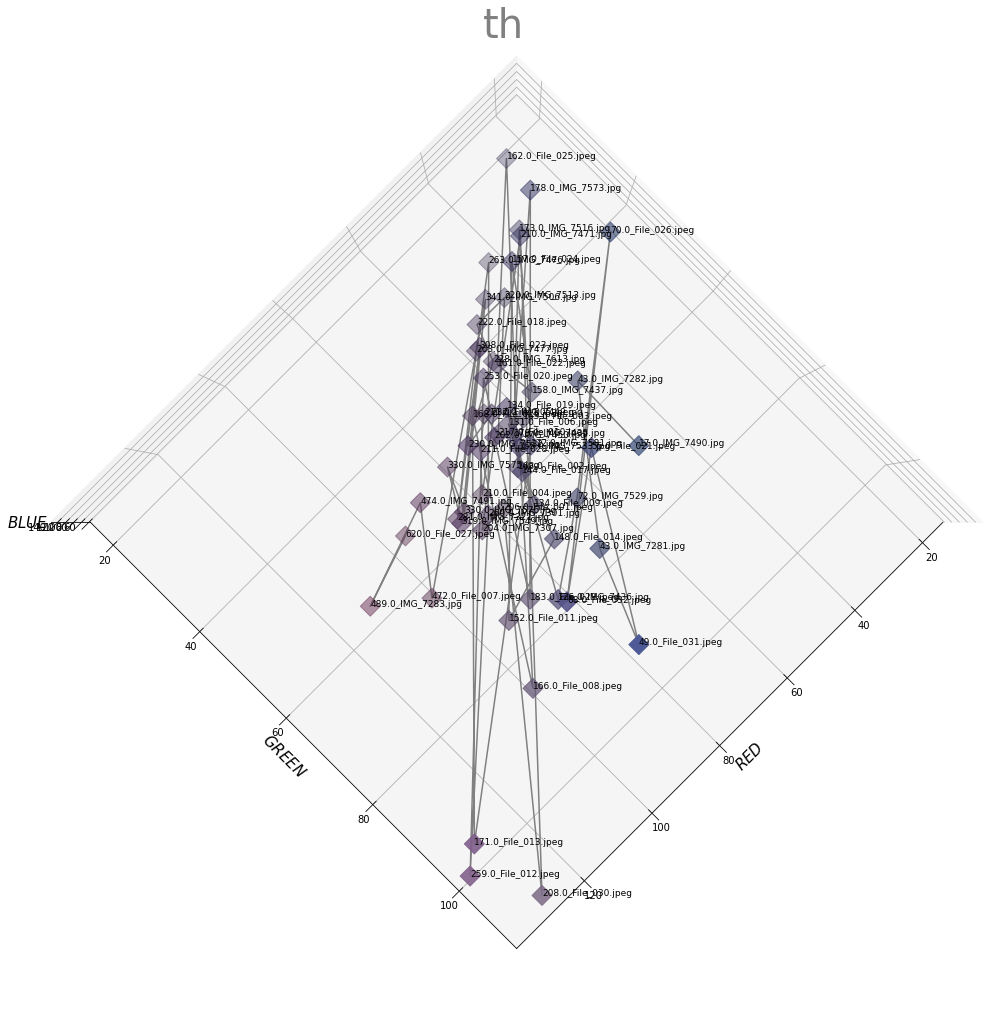

<Axes3DSubplot:title={'center':'th'}, xlabel='$RED$', ylabel='$GREEN$'>

In [24]:
importlib.reload(pre_process)

pre_process.scatter_chart('th',df,90,45)

In [8]:
############ TC

importlib.reload(pre_process)

csv_name = "tc.csv"
tc_df=pre_process.process_stripe_image(csv_name)
tc_df.head()

  0%|          | 0/55 [00:00<?, ?it/s]

,file_path,white_balance_y,white_balance_x,color_y,color_x,actual_value,value_color_r,value_color_g,value_color_b
47,IMG_7532.jpg,1878,852,1880,718,0.10,200,186,127
0,File_018.jpeg,2056,710,2052,590,0.12,214,194,141
1,File_026.jpeg,1965,650,1970,538,0.13,193,173,123
2,File_009.jpeg,1900,811,1908,673,0.13,199,190,137
3,File_032.jpeg,350,131,352,156,0.14,209,197,130


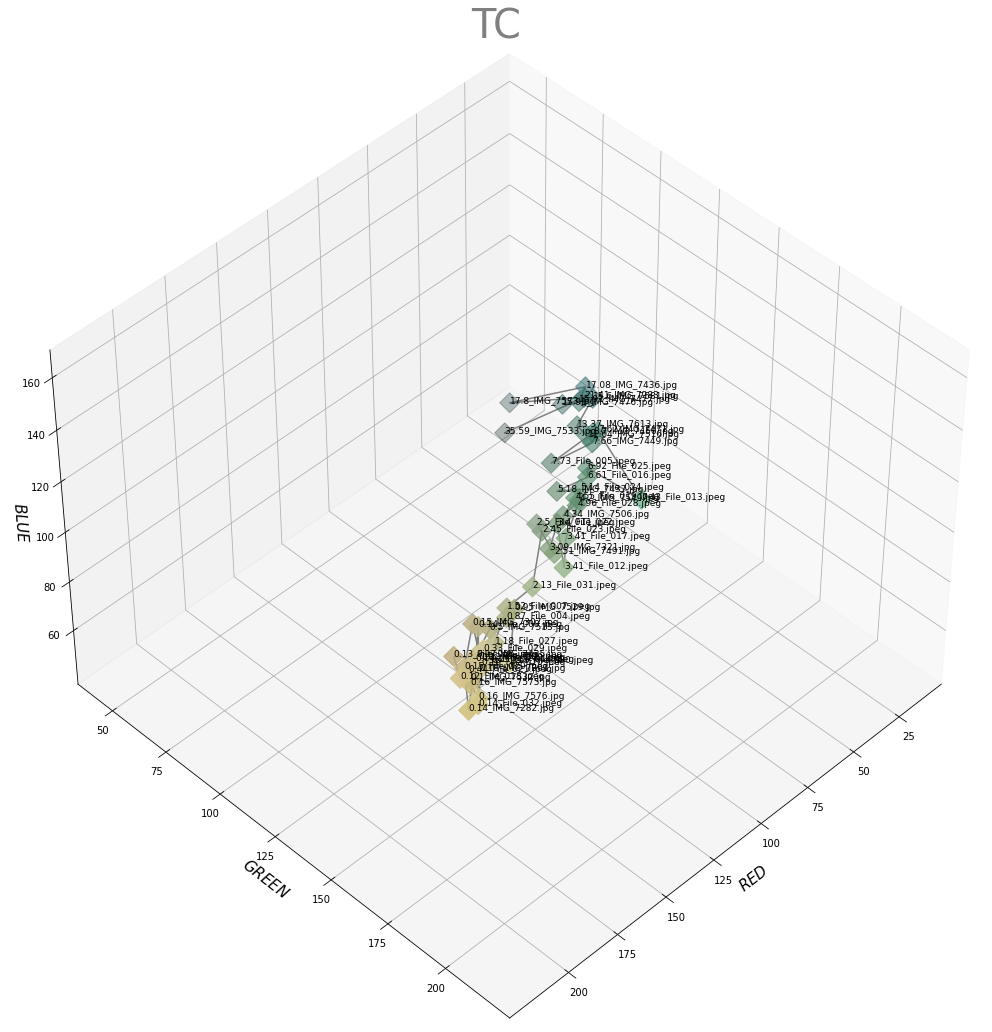

<Axes3DSubplot:title={'center':'TC'}, xlabel='$RED$', ylabel='$GREEN$'>

In [23]:
importlib.reload(pre_process)

pre_process.scatter_chart('TC',tc_df,45,45)

In [21]:

############ TC

importlib.reload(pre_process)

csv_name = "ph.csv"
ph_df=pre_process.process_stripe_image(csv_name)
# print(ph_df)

  0%|          | 0/55 [00:00<?, ?it/s]

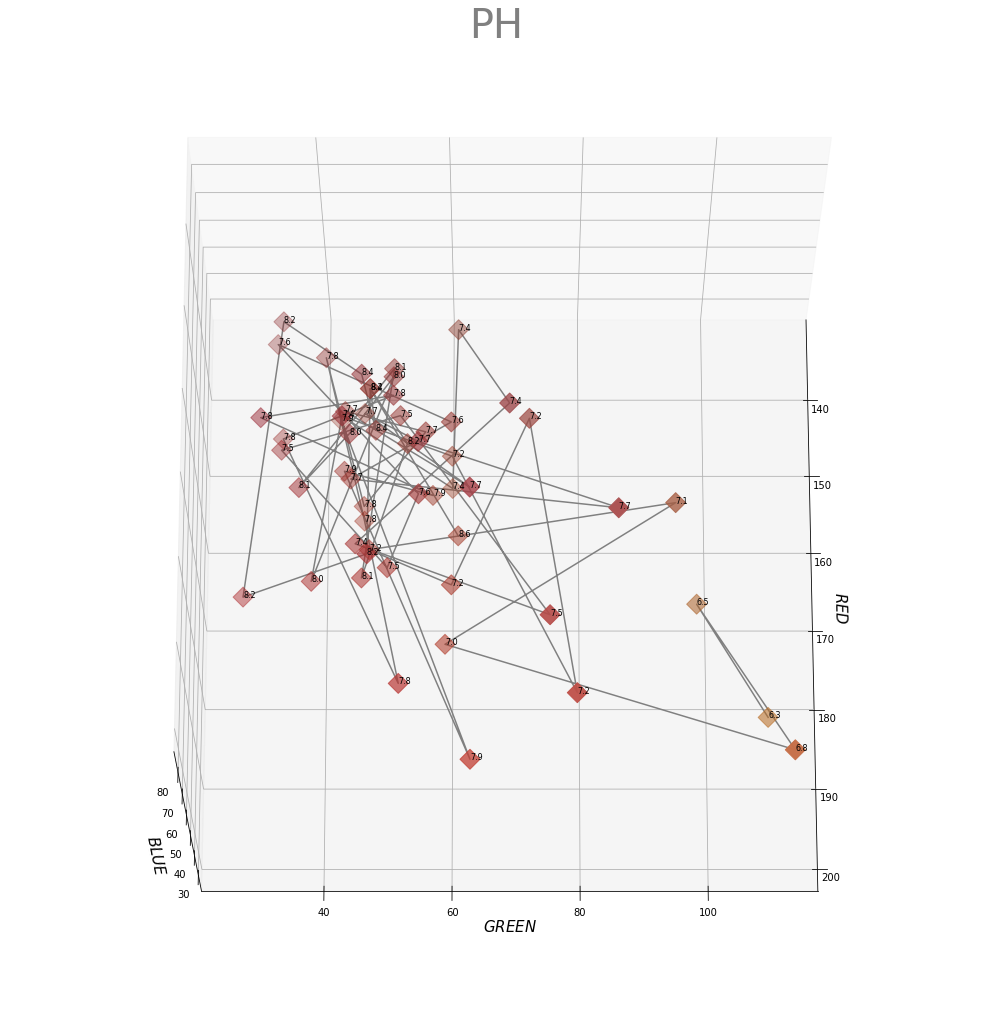

<Axes3DSubplot:title={'center':'PH'}, xlabel='$RED$', ylabel='$GREEN$'>

In [37]:
importlib.reload(pre_process)

pre_process.scatter_chart('PH',ph_df,70,0)